<a href="https://colab.research.google.com/github/khangsheng1/solo_projects/blob/main/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
pip install torch torchvision torchaudio pandas scikit-learn

In [35]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [36]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


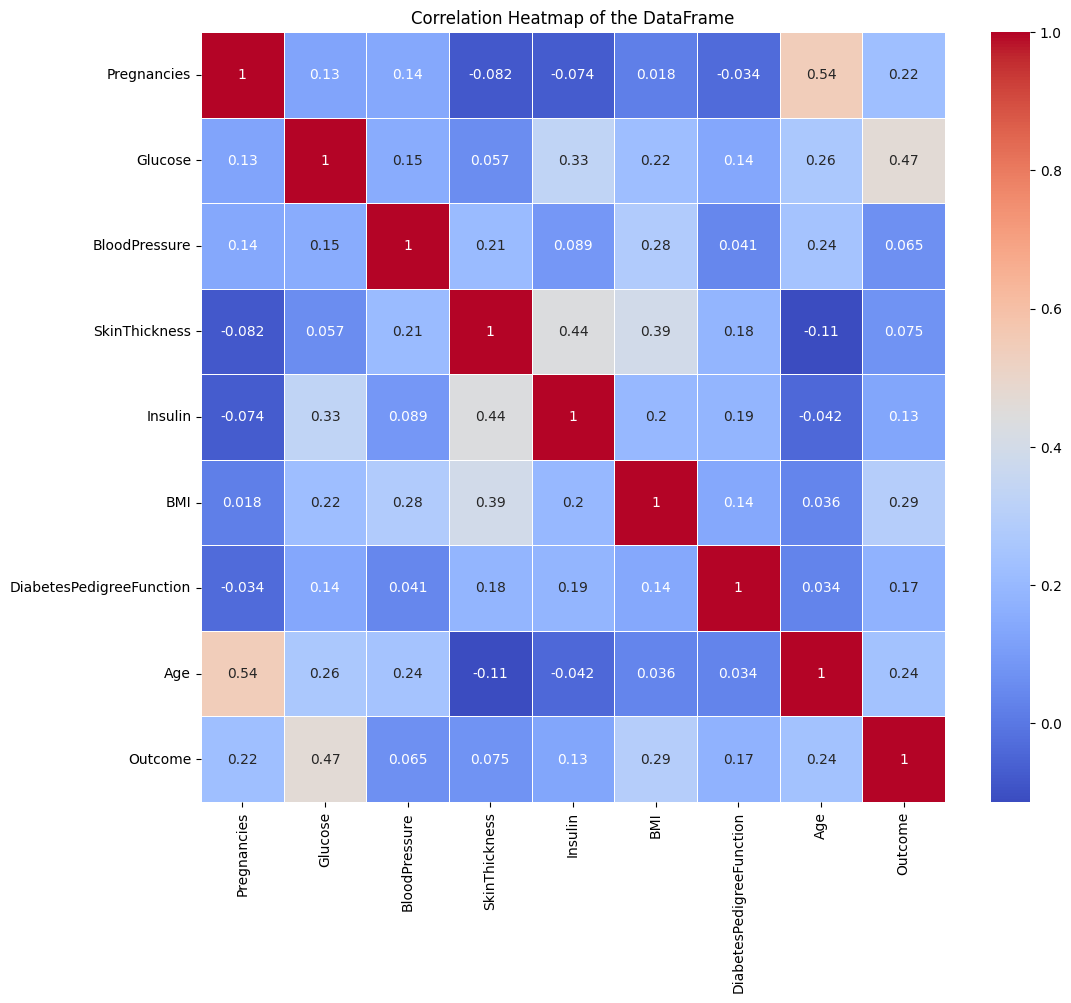

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of the DataFrame')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show how many entries are in training and testing sets
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


### Machine Learning (Decision Tree Classifier)

In [55]:
# This function is to plot the confusion matrix.

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])
    plt.show()

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [50]:
tree_cv = GridSearchCV(tree,parameters,cv=10)

In [57]:
tree_cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [58]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.7508196721311475


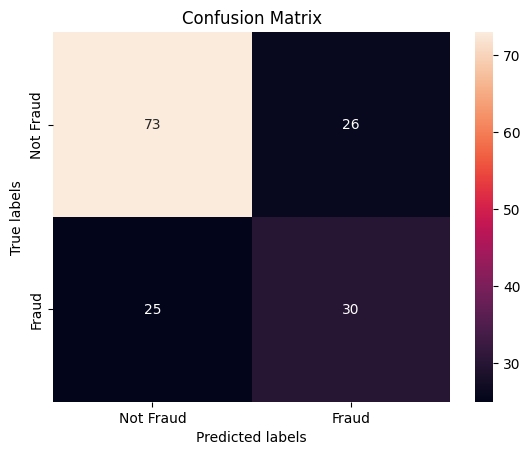

In [56]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### Neural Network

In [39]:
import torch.nn as nn
import torch.optim as optim

# Define the neural network class
class DiabetesNN(nn.Module):
    def __init__(self):
        super(DiabetesNN, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(8, 16)  # Input layer (8 features) to hidden layer (16 neurons)
        self.fc2 = nn.Linear(16, 1)  # Hidden layer to output layer (1 output)
        self.relu = nn.ReLU()        # Activation function
        self.sigmoid = nn.Sigmoid()  # Sigmoid for binary classification

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Instantiate the model, define the loss function and optimizer
model = DiabetesNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

  # Evaluate the model on the test set
with torch.no_grad():
    predicted = model(X_test)
    predicted = (predicted > 0.5).float()  # Apply threshold of 0.5 for binary classification

    accuracy = (predicted.eq(y_test).sum() / float(y_test.shape[0])).item() * 100
    print(f'Accuracy on test data: {accuracy:.2f}%')

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set
y_pred = (model(X_test) > 0.5).float()

# Precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Epoch [10/100], Loss: 0.7191
Epoch [20/100], Loss: 0.7053
Epoch [30/100], Loss: 0.6922
Epoch [40/100], Loss: 0.6797
Epoch [50/100], Loss: 0.6675
Epoch [60/100], Loss: 0.6555
Epoch [70/100], Loss: 0.6438
Epoch [80/100], Loss: 0.6319
Epoch [90/100], Loss: 0.6201
Epoch [100/100], Loss: 0.6083
Accuracy on test data: 73.38%
Precision: 0.62
Recall: 0.64
F1 Score: 0.63


In [40]:
import torch.nn.functional as F

class ImprovedDiabetesNN(nn.Module):
    def __init__(self):
        super(ImprovedDiabetesNN, self).__init__()
        self.fc1 = nn.Linear(8, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.2)  # Dropout to prevent overfitting

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))  # Add dropout in hidden layers
        x = torch.sigmoid(self.fc3(x))
        return x

# Reinitialize and train the improved model
model = ImprovedDiabetesNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Try a lower learning rate and L2 regularization

# Training loop remains the same

# Training the model
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    predicted = model(X_test)
    predicted = (predicted > 0.5).float()  # Apply threshold of 0.5 for binary classification

    accuracy = (predicted.eq(y_test).sum() / float(y_test.shape[0])).item() * 100
    print(f'Accuracy on test data: {accuracy:.2f}%')

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set
y_pred = (model(X_test) > 0.4).float()

# Precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Epoch [10/100], Loss: 0.7008
Epoch [20/100], Loss: 0.6809
Epoch [30/100], Loss: 0.6569
Epoch [40/100], Loss: 0.6307
Epoch [50/100], Loss: 0.5954
Epoch [60/100], Loss: 0.5680
Epoch [70/100], Loss: 0.5326
Epoch [80/100], Loss: 0.5068
Epoch [90/100], Loss: 0.4896
Epoch [100/100], Loss: 0.4704
Accuracy on test data: 78.57%
Precision: 0.64
Recall: 0.76
F1 Score: 0.69
